# Comparing CPU vs GPU processing

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from torch_nlm import nlm2d
import time

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.0.1
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [2]:
!pip install nlm-torch

In [3]:
def show_gray(img, title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

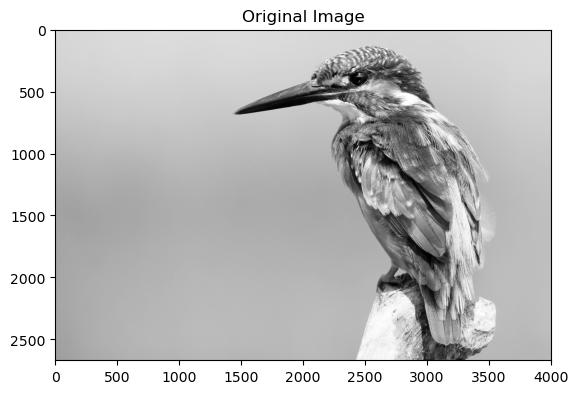

In [4]:
# Load image
image = cv2.imread('bird.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_gray(image_gray, title="Original Image")

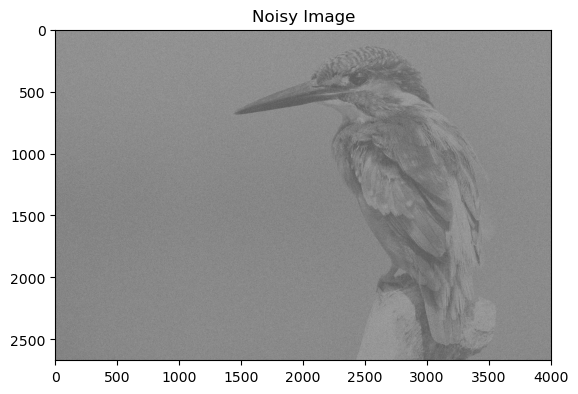

In [5]:
image_torch = torch.tensor(image_gray, dtype=torch.float32)
image_noisy = image_torch + torch.normal(0, 100, image_torch.shape)

show_gray(image_noisy, title="Noisy Image")

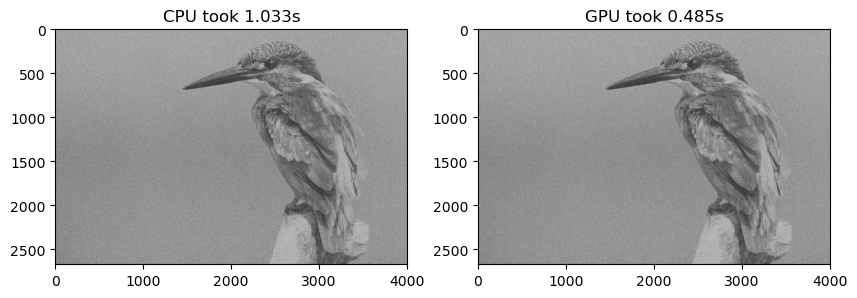

In [6]:
plt.figure(figsize=(10,5))

# CPU
start_time = time.time()
image_nlm = nlm2d(image_noisy.to('cpu'))
end_time = time.time()
plt.subplot(1,2,1)
show_gray(image_nlm, title=f"CPU took {(end_time - start_time):.3f}s")

# GPU
start_time = time.time()
image_nlm = nlm2d(image_noisy.to('mps'))
end_time = time.time()
plt.subplot(1,2,2)
show_gray(image_nlm.cpu(), title=f"GPU took {(end_time - start_time):.3f}s")

plt.show()